In [13]:
import numpy as np

# functions

In [14]:
def f(Xk):
    function = np.square(Xk[0]) + np.square(Xk[1])
    return function


def gradF(Xk):
    return np.array([2 * Xk[0], 2 * Xk[1]])


def DelX(Xk):
    return gradF(Xk) / np.linalg.norm(gradF(Xk))


def Armijo_Goldstein_condition(Xk, Tk, a):
    upper = f(Xk - (Tk * DelX(Xk)))
    down = f(Xk) + a * Tk * np.dot(gradF(Xk), DelX(Xk))
    # print(upper, "|", down, "|", Tk)
    return upper < down


def gradientStopCondition(Xkp,Xk, e):
    con = np.abs(np.linalg.norm(Xk) - np.linalg.norm(Xkp))
    return con < e


def CaculateTk(Xk, T0, a, b):
    Tk = T0
    j = 0
    while True:
        if Armijo_Goldstein_condition(Xk, Tk, a):
            break
        Tk = b * Tk
        j += 1

    # print("Tk =", Tk)
    return Tk, j

In [15]:
def Algo(X0, T0, a, b, moreinfo=False,error=1e-03):
    X = []  # array of Xk
    X.append(X0)
    # k number of iteration for X
    for k in range(0, 200):
        Xk = X[k]
        # computong Tk in another loop
        Tk, j = CaculateTk(Xk, T0, a, b)
        Xk = Xk - a * Tk * gradF(Xk)
        X.append(Xk)
        if moreinfo:
            print("j =", j)
            print("k =", k)
            print("Tk =", Tk)
            print("-----------")
        if gradientStopCondition(Xk,X[k],error):
            break
    return X

# implementation and plot

In [16]:
X0 = np.array([100.0, -30.0])  # starting point
a = 0.4  # learning rate between 0 and 1 (should be small)
b = 0.7  # backtracking parameter between 0 and 1 (should be big)
T0 = 1.0
print("X0 =", X0)
print("learning rate =", a)
print("f(x0)", f(X0))
e = 1e-02
X = Algo(X0, T0, a, b,moreinfo=False,error=e)

X0 = [100. -30.]
learning rate = 0.4
f(x0) 10900.0


In [17]:
import matplotlib.pyplot as plt

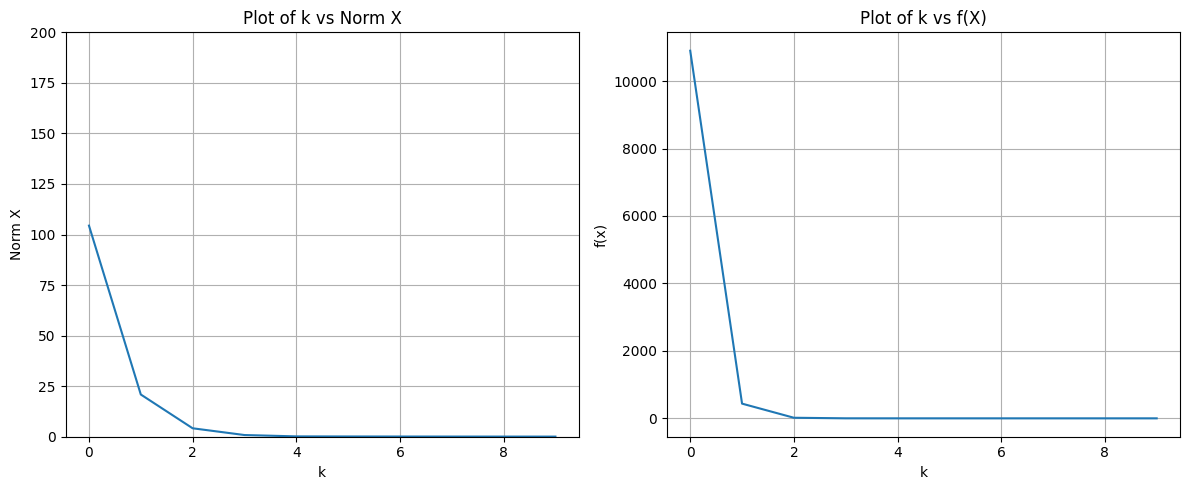

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate normX and Fx
k = range(0, len(X))
normX = np.linalg.norm(X, axis=1)
Fx = np.array([f(Xk) for Xk in X])  # Replace f with your actual function

# Create subplots
plt.figure(figsize=(12, 5))

# Plot Norm X
plt.subplot(1, 2, 1)
plt.plot(k, normX)
plt.ylim(0, 200)
plt.xlabel("k")
plt.ylabel("Norm X")
plt.title("Plot of k vs Norm X")
plt.grid()

# Plot f(X)
plt.subplot(1, 2, 2)
plt.plot(k, Fx)
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title("Plot of k vs f(X)")
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()
